In [17]:
import os
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from IPython.display import Image,display

In [29]:
class AgentState(TypedDict):
    num1:int
    op:str
    num2:int
    final_number:int

In [30]:
def add_operation(state:AgentState) -> AgentState:
    """ 
    Add two numbers
    num1: first number
    num2: second number
    """
    state['final_number'] = state['num1'] + state['num2']

    return state


In [31]:
def subtract_operation(state:AgentState):
    """ 
    subtract two numbers
    num1: first number
    num2: second number
    """
    state['final_number'] = state['num1'] + state['num2']

    return state['final_number']

In [32]:
def decide_next_step(state:AgentState) -> AgentState:
    """ Decide next step """
    if state['op'] == "+":
        return "additon_operation"
    elif state['op'] == "-":
        return "subtract_operation"
    else:
        return "invalid"

In [33]:
builder = StateGraph(AgentState)

In [34]:
builder.add_node("addition",add_operation)
builder.add_node("subtract",subtract_operation)
builder.add_node("router",lambda state:state)
builder.add_conditional_edges("router",
                              decide_next_step,
                              {
                                  "additon_operation":"addition",
                                  "subtract_operation":"subtract"
                              }
                              
                              )

builder.add_edge(START,"router")
builder.add_edge("addition",END)
builder.add_edge("subtract",END)

In [35]:
graph = builder.compile()

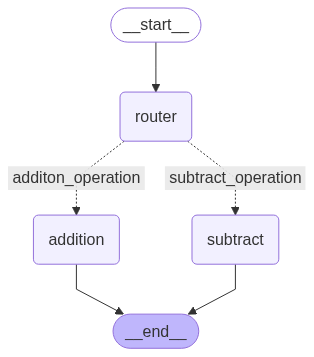

In [36]:
Image(graph.get_graph().draw_mermaid_png())

In [37]:
graph.invoke({"num1":2,"op":"+","num2":10})

{'num1': 2, 'op': '+', 'num2': 10, 'final_number': 12}

In [22]:
{"num1":2,"op":"+","num2":10}

{'num1': 2, 'op': '+', 'num2': 10}